# Support Vector Machines for Classification

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('svm.csv')

In [3]:
data

,x1,x2,r
0,0,0,A
1,1,1,A
2,2,3,B
3,2,0,A
4,3,4,B


C:\Users\dougl\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


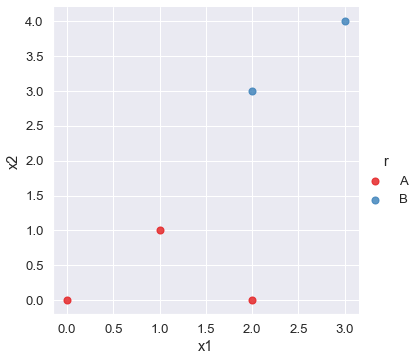

In [5]:
sns.lmplot('x1', 'x2',
          data=data,
          hue='r',
          palette='Set1',
          fit_reg=False,
          scatter_kws={"s":50});

In [6]:
from sklearn import svm
points = data[['x1','x2']].values
result = data['r']

clf = svm.SVC(kernel='linear')
clf.fit(points, result)

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ', clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
     np.abs(clf.dual_coef_))

Vector of weights (w) =  [0.4 0.8]
b =  -2.2
Indices of support vectors =  [1 2]
Support vectors =  [[1. 1.]
 [2. 3.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.4 0.4]]


In [7]:
# svm.LinearSVC: linear support vector classification
# svm.LinearSVR: linear support vector regression
# svm.NuSVC: Nu-Support vector classification
# svm.NuSVR: Nu-support vector regression
# svm.OneClassSVM: Unsupervised outlier detection
# svm.SVC: C-support vector classification
# svm.SVR: Epsilon-support vector regression


C:\Users\dougl\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


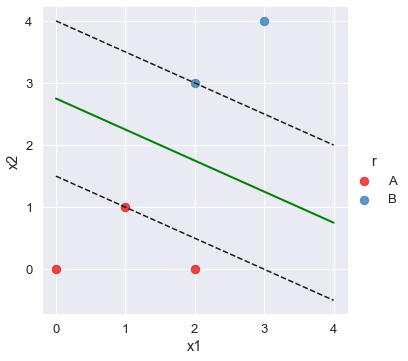

In [9]:
# Plotting the hyperplane:

w = clf.coef_[0]
slope = -w[0]/w[1]

b= clf.intercept_[0]

# find coordinates for hyperplane
xx = np.linspace(0,4)
yy = slope*xx-(b/w[1])

s=clf.support_vectors_[0]
yy_down = slope*xx + (s[1] - slope * s[0])

s=clf.support_vectors_[-1]
yy_up = slope*xx+(s[1] - slope* s[0])
sns.lmplot('x1','x2', data=data, hue='r', palette='Set1',
          fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='green');

plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--');

In [10]:
# Making predictions

print(clf.predict([[3,3]])[0])
print(clf.predict([[4,0]])[0])
print(clf.predict([[2,2]])[0])
print(clf.predict([[1,2]])[0])

B
A
B
A


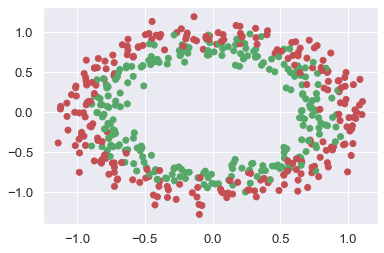

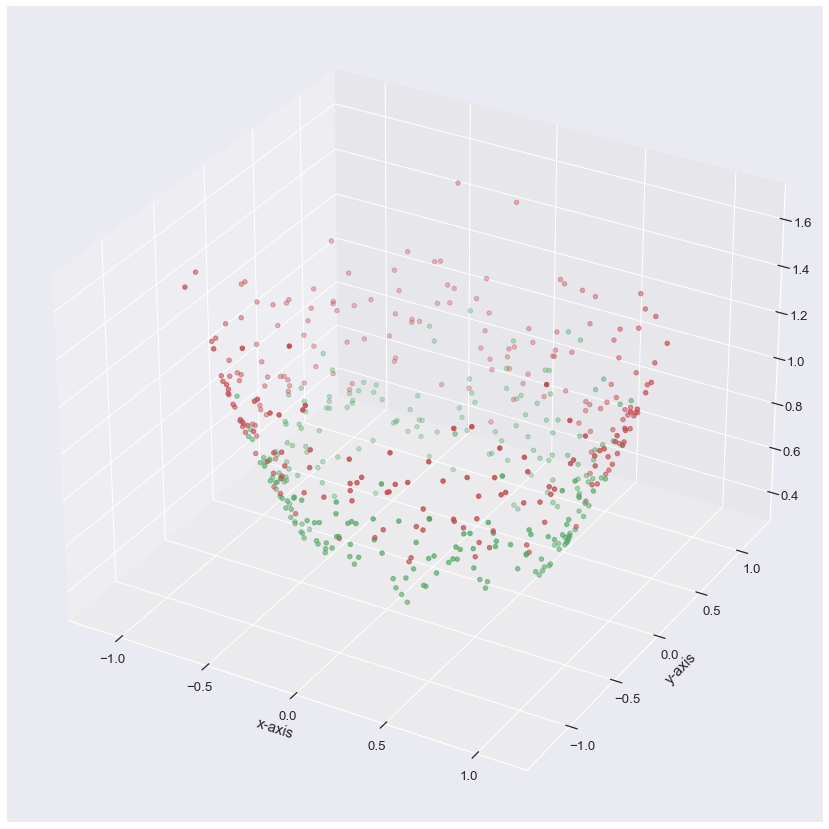

In [11]:
# Kernel trick: adding dimensions so that you can get a clear separation
# add z = x^2 + y^2

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

X, c = make_circles(n_samples=500, noise=0.09)

rgb =np.array(['r','g'])
plt.scatter(X[:,0], X[:,1], color=rgb[c])
plt.show()

fig =plt.figure(figsize=(18,15))
ax=fig.add_subplot(111,projection='3d')
z=X[:,0]**2 + X[:,1]**2
ax.scatter(X[:,0], X[:,1], z, color=rgb[c])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [16]:
# Plotting the 3d hyperplane

features=np.concatenate((X, z.reshape(-1,1)), axis=1)

from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(features,c)

SVC(kernel='linear')

In [17]:
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1] * y)/clf.coef_[0][2]

In [18]:
tmp = np.linspace(-1.5,1.5,100)
x,y = np.meshgrid(tmp,tmp)

ax.plot_surface(x,y, x3(x,y))
plt.show()

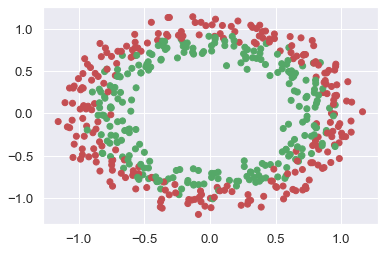

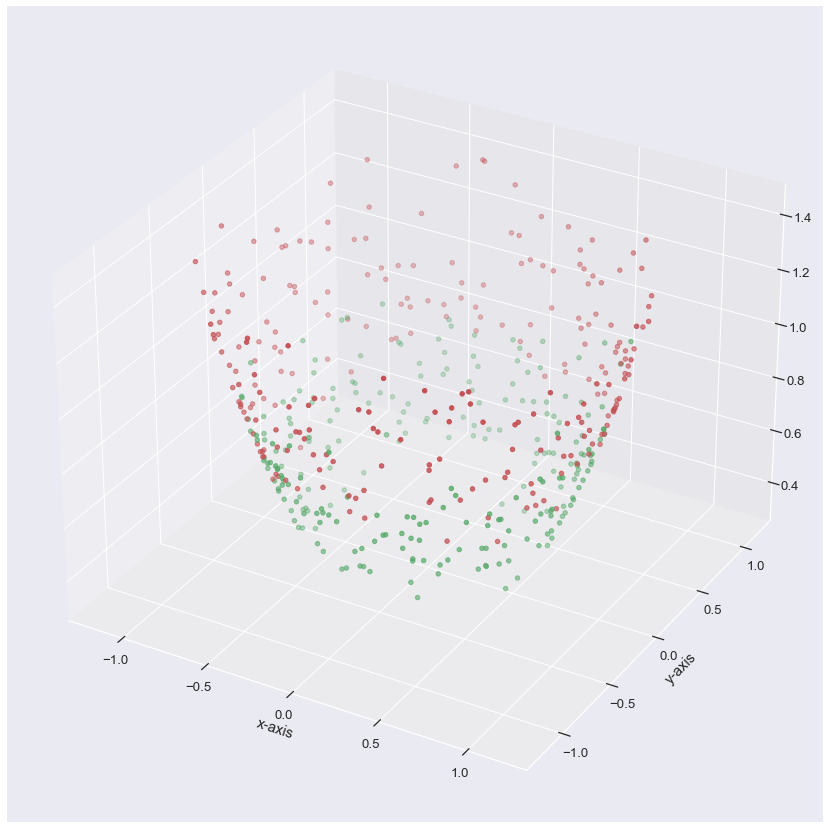

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
X, c = make_circles(n_samples=500, noise=0.09)

rgb =np.array(['r','g'])
plt.scatter(X[:,0], X[:,1], color=rgb[c])
plt.show()

fig =plt.figure(figsize=(18,15))
ax=fig.add_subplot(111,projection='3d')
z=X[:,0]**2 + X[:,1]**2
ax.scatter(X[:,0], X[:,1], z, color=rgb[c])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

features=np.concatenate((X, z.reshape(-1,1)), axis=1)
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(features,c)
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1] * y)/clf.coef_[0][2]
tmp = np.linspace(-1.5,1.5,100)
x,y = np.meshgrid(tmp,tmp)

ax.plot_surface(x,y, x3(x,y))
plt.show()